---------------------------
<h4> Pietro Bellamio 866794</h4>
<h1><center> Project on Home Credit Default Risk competition </center></h1>

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
import seaborn as sns

---------------------------
<h2><center> Data Gathering and Manipulation</center></h2>

In [2]:
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'application_train.csv'

In [3]:
app_train.set_index(['SK_ID_CURR'])

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
100002           1         Cash loans           M            N   
100003           0         Cash loans           F            N   
100004           0    Revolving loans           M            Y   
100006           0         Cash loans           F            N   
100007           0         Cash loans           M            N   
...            ...                ...         ...          ...   
456251           0         Cash loans           M            N   
456252           0         Cash loans           F            N   
456253           0         Cash loans           F            N   
456254           1         Cash loans           F            N   
456255           0         Cash loans           F            N   

           FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                                               
100002                   Y             0          202500.0    406597.5   
100003                   N             0          270000.0   1293502.5   
100004                   Y             0           67500.0    135000.0   
100006                   Y             0          135000.0    312682.5   
100007                   Y             0          121500.0    513000.0   
...                    ...           ...               ...         ...   
456251                   N             0          157500.0    254700.0   
456252                   Y             0           72000.0    269550.0   
456253                   Y             0          153000.0    677664.0   
456254                   Y             0          171000.0    370107.0   
456255                   N             0          157500.0    675000.0   

            AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18  \
SK_ID_CURR                                ...                    
100002          24700.5         351000.0  ...                0   
100003          35698.5        1129500.0  ...                0   
100004           6750.0         135000.0  ...                0   
100006          29686.5         297000.0  ...                0   
100007          21865.5         513000.0  ...                0   
...                 ...              ...  ...              ...   
456251          27558.0         225000.0  ...                0   
456252          12001.5         225000.0  ...                0   
456253          29979.0         585000.0  ...                0   
456254          20205.0         319500.0  ...                0   
456255          49117.5         675000.0  ...                0   

           FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
SK_ID_CURR                                                      
100002                    0                0                0   
100003                    0                0                0   
100004                    0                0                0   
100006                    0                0                0   
100007                    0                0                0   
...                     ...              ...              ...   
456251                    0                0                0   
456252                    0                0                0   
456253                    0                0                0   
456254                    0                0                0   
456255                    0                0                0   

           AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
SK_ID_CURR                                                         
100002                            0.0                        0.0   
100003                            0.0                        0.0   
100004                            0.0                        0.0   
100006                            NaN                        NaN   
100007                            0.0                        0.0   
...      

In [4]:
app_test.set_index(['SK_ID_CURR'])

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
SK_ID_CURR                                                               
100001             Cash loans           F            N               Y   
100005             Cash loans           M            N               Y   
100013             Cash loans           M            Y               Y   
100028             Cash loans           F            N               Y   
100038             Cash loans           M            Y               N   
...                       ...         ...          ...             ...   
456221             Cash loans           F            N               Y   
456222             Cash loans           F            N               N   
456223             Cash loans           F            Y               Y   
456224             Cash loans           M            N               N   
456250             Cash loans           F            Y               N   

            CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                            
100001                 0          135000.0    568800.0      20560.5   
100005                 0           99000.0    222768.0      17370.0   
100013                 0          202500.0    663264.0      69777.0   
100028                 2          315000.0   1575000.0      49018.5   
100038                 1          180000.0    625500.0      32067.0   
...                  ...               ...         ...          ...   
456221                 0          121500.0    412560.0      17473.5   
456222                 2          157500.0    622413.0      31909.5   
456223                 1          202500.0    315000.0      33205.5   
456224                 0          225000.0    450000.0      25128.0   
456250                 0          135000.0    312768.0      24709.5   

            AMT_GOODS_PRICE NAME_TYPE_SUITE  ... FLAG_DOCUMENT_18  \
SK_ID_CURR                                   ...                    
100001             450000.0   Unaccompanied  ...                0   
100005             180000.0   Unaccompanied  ...                0   
100013             630000.0             NaN  ...                0   
100028            1575000.0   Unaccompanied  ...                0   
100038             625500.0   Unaccompanied  ...                0   
...                     ...             ...  ...              ...   
456221             270000.0   Unaccompanied  ...                0   
456222             495000.0   Unaccompanied  ...                0   
456223             315000.0   Unaccompanied  ...                0   
456224             450000.0          Family  ...                0   
456250             270000.0   Unaccompanied  ...                0   

           FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
SK_ID_CURR                                                      
100001                    0                0                0   
100005                    0                0                0   
100013                    0                0                0   
100028                    0                0                0   
100038                    0                0                0   
...                     ...              ...              ...   
456221                    0                0                0   
456222                    0                0                0   
456223                    0                0                0   
456224                    0                0                0   
456250                    0                0                0   

            AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
SK_ID_CURR                                                          
100001                             0.0                        0.0   
100005                             0.0                        0.0   
100013                             0.0                        0.0   
100028                             

---------------------------
<h3> Undersampling due to unbalanced data </h3>

In [5]:
count_class_0, count_class_1 = app_train.TARGET.value_counts()

df_class_0 = app_train[app_train['TARGET'] == 0]
df_class_1 = app_train[app_train['TARGET'] == 1]

In [6]:
df_class_0_under = df_class_0.sample(count_class_1)
app_train = pd.concat([df_class_0_under, df_class_1], axis=0)

In [7]:
app_train.set_index(['SK_ID_CURR'])

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
SK_ID_CURR                                                       
276895           0         Cash loans           F            N   
263849           0         Cash loans           F            Y   
302741           0         Cash loans           M            N   
317097           0         Cash loans           F            N   
243744           0         Cash loans           F            N   
...            ...                ...         ...          ...   
456186           1         Cash loans           M            N   
456215           1         Cash loans           F            N   
456225           1         Cash loans           M            N   
456233           1         Cash loans           F            N   
456254           1         Cash loans           F            N   

           FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
SK_ID_CURR                                                               
276895                   Y             0          112500.0    518562.0   
263849                   N             0          180000.0    973710.0   
302741                   Y             0          270000.0    521280.0   
317097                   Y             2          157500.0    942300.0   
243744                   Y             0          130500.0    276277.5   
...                    ...           ...               ...         ...   
456186                   N             1          207000.0    450000.0   
456215                   N             1          144000.0   1303200.0   
456225                   Y             0          225000.0    297000.0   
456233                   Y             0          225000.0    521280.0   
456254                   Y             0          171000.0    370107.0   

            AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18  \
SK_ID_CURR                                ...                    
276895          26604.0         463500.0  ...                0   
263849          31540.5         697500.0  ...                0   
302741          41926.5         450000.0  ...                0   
317097          26041.5         675000.0  ...                1   
243744          21379.5         238500.0  ...                0   
...                 ...              ...  ...              ...   
456186          32746.5         450000.0  ...                0   
456215          46809.0        1125000.0  ...                0   
456225          19975.5         297000.0  ...                0   
456233          23089.5         450000.0  ...                0   
456254          20205.0         319500.0  ...                0   

           FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
SK_ID_CURR                                                      
276895                    0                0                0   
263849                    0                0                0   
302741                    0                0                0   
317097                    0                0                0   
243744                    0                0                0   
...                     ...              ...              ...   
456186                    0                0                0   
456215                    0                0                0   
456225                    0                0                0   
456233                    0                0                0   
456254                    0                0                0   

           AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
SK_ID_CURR                                                         
276895                            0.0                        0.0   
263849                            0.0                        0.0   
302741                            0.0                        0.0   
317097                            0.0                        0.0   
243744                            0.0                        0.0   
...      

In [8]:
app_test.set_index(['SK_ID_CURR'])

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
SK_ID_CURR                                                               
100001             Cash loans           F            N               Y   
100005             Cash loans           M            N               Y   
100013             Cash loans           M            Y               Y   
100028             Cash loans           F            N               Y   
100038             Cash loans           M            Y               N   
...                       ...         ...          ...             ...   
456221             Cash loans           F            N               Y   
456222             Cash loans           F            N               N   
456223             Cash loans           F            Y               Y   
456224             Cash loans           M            N               N   
456250             Cash loans           F            Y               N   

            CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                                                            
100001                 0          135000.0    568800.0      20560.5   
100005                 0           99000.0    222768.0      17370.0   
100013                 0          202500.0    663264.0      69777.0   
100028                 2          315000.0   1575000.0      49018.5   
100038                 1          180000.0    625500.0      32067.0   
...                  ...               ...         ...          ...   
456221                 0          121500.0    412560.0      17473.5   
456222                 2          157500.0    622413.0      31909.5   
456223                 1          202500.0    315000.0      33205.5   
456224                 0          225000.0    450000.0      25128.0   
456250                 0          135000.0    312768.0      24709.5   

            AMT_GOODS_PRICE NAME_TYPE_SUITE  ... FLAG_DOCUMENT_18  \
SK_ID_CURR                                   ...                    
100001             450000.0   Unaccompanied  ...                0   
100005             180000.0   Unaccompanied  ...                0   
100013             630000.0             NaN  ...                0   
100028            1575000.0   Unaccompanied  ...                0   
100038             625500.0   Unaccompanied  ...                0   
...                     ...             ...  ...              ...   
456221             270000.0   Unaccompanied  ...                0   
456222             495000.0   Unaccompanied  ...                0   
456223             315000.0   Unaccompanied  ...                0   
456224             450000.0          Family  ...                0   
456250             270000.0   Unaccompanied  ...                0   

           FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
SK_ID_CURR                                                      
100001                    0                0                0   
100005                    0                0                0   
100013                    0                0                0   
100028                    0                0                0   
100038                    0                0                0   
...                     ...              ...              ...   
456221                    0                0                0   
456222                    0                0                0   
456223                    0                0                0   
456224                    0                0                0   
456250                    0                0                0   

            AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
SK_ID_CURR                                                          
100001                             0.0                        0.0   
100005                             0.0                        0.0   
100013                             0.0                        0.0   
100028                             

---------------------------
<h3>Exploring Missing values </h3>

In [9]:
#funzione per trovare i missing values in un dataset
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return mis_val_table_ren_columns

In [10]:
missing_values = missing_values_table(app_train)
missing_values

Missing Values  % of Total Values
COMMONAREA_MODE                    35624               71.8
COMMONAREA_MEDI                    35624               71.8
COMMONAREA_AVG                     35624               71.8
NONLIVINGAPARTMENTS_MEDI           35402               71.3
NONLIVINGAPARTMENTS_AVG            35402               71.3
...                                  ...                ...
DEF_30_CNT_SOCIAL_CIRCLE             106                0.2
OBS_30_CNT_SOCIAL_CIRCLE             106                0.2
AMT_GOODS_PRICE                       41                0.1
DAYS_LAST_PHONE_CHANGE                 1                0.0
AMT_ANNUITY                            1                0.0

[66 rows x 2 columns]

---------------------------
<h3> Functions for categorical encoding and alignment </h3>

In [11]:
from sklearn.preprocessing import LabelEncoder

def label_encode(app_train, app_test) : 
    le = LabelEncoder()
    le_count = 0

    for col in app_train:
        if app_train[col].dtype == 'object':
            set_values = app_train[col].unique()
            num_values = len(list(set_values))
            if num_values <= 2:
                le.fit(app_train[col])
                app_train[col] = le.transform(app_train[col])
                app_test[col] = le.transform(app_test[col])
                le_count += 1
    return app_train, app_test


def one_hot_encode(app_train, app_test) :
    app_train = pd.get_dummies(app_train)
    app_test = pd.get_dummies(app_test)
    return app_train, app_test


def align_train_test(app_train, app_test) :
    train_labels = app_train['TARGET']
    app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
    app_train['TARGET'] = train_labels
    
    return train_labels, app_train, app_test

In [12]:
# Label
app_train, app_test = label_encode(app_train, app_test)
# One-hot
app_train, app_test = one_hot_encode(app_train, app_test)
# Alignment
train_labels, app_train, app_test = align_train_test(app_train, app_test)
# Creating 2 new Dataframes with aligned data
train = app_train.drop(columns = ['TARGET'], errors = 'ignore')
test = app_test.copy()


---------------------------
<h3> Dealing with missing values and Scaling </h3>

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

imputer = SimpleImputer(strategy = 'median') 

scaler = MinMaxScaler(feature_range = (0, 1))

In [14]:
imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(test)


In [15]:
scaler.fit(train) 

train = scaler.transform(train)
test = scaler.transform(test)


----------------------
<h2><center> LOG_REG AND SVC </center></h2>

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
# LOGREG 
log_reg = LogisticRegression(C = 0.0001, class_weight = 'balanced')#class weight non necessatrio 
log_reg.fit(train, train_labels)
log_reg_pred = log_reg.predict_proba(test)[:, 1]
finalLOGREG = app_test[['SK_ID_CURR']]
finalLOGREG['TARGET'] = log_reg_pred
finalLOGREG.to_csv('finalLOGREG.csv', index = False)

In [18]:
log_reg_pred = log_reg.predict_proba(train)[:, 1]
print(log_reg_pred)

[0.433947   0.50791194 0.51971182 ... 0.50605892 0.51317776 0.511043  ]


In [19]:
from sklearn.metrics import roc_auc_score
test_acc = roc_auc_score(y_true = train_labels, 
                         y_score = log_reg_pred)
test_acc

0.6808006368851852

In [20]:
#SVCREG
from sklearn.svm import SVC
svc_reg = SVC(C = 0.001, class_weight = 'balanced', max_iter = 50, probability=True)
svc_reg.fit(train, train_labels)
svc_reg_pred = svc_reg.predict_proba(test)[:, 1]
print(svc_reg_pred)

finalSVC = app_test[['SK_ID_CURR']]
finalSVC['TARGET'] = svc_reg_pred
finalSVC.to_csv('finalSVC.csv', index = False)

[0.50761573 0.54693728 0.45107167 ... 0.44443508 0.36301021 0.52833452]


In [21]:
svc_reg_pred = svc_reg.predict_proba(train)[:, 1]
print(svc_reg_pred)

[0.433947   0.50791194 0.51971182 ... 0.50605892 0.51317776 0.511043  ]


In [22]:
from sklearn.metrics import roc_auc_score
test_acc = roc_auc_score(y_true = train_labels, 
                         y_score = svc_reg_pred)
test_acc

0.5767551835659284

----------------------
<h3>Pipelines and Gridsearch </h3>

In [23]:
#Pipeline su svc
from sklearn.pipeline import Pipeline
clf = Pipeline([('imp', SimpleImputer()),
                ('sca', MinMaxScaler(feature_range = (0, 1))),
                ('clf', svc_reg)],
                verbose = True)
param_grid =\
{
    'clf__C': [0.01, 0.1,1],
    'imp__strategy' : ['mean','median']
}

In [24]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(estimator = clf, 
                      param_grid = param_grid, 
                      cv = 5,
                      scoring = 'roc_auc',
                      n_jobs = -1,
                      verbose = 3)

search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imp', SimpleImputer()),
                                       ('sca', MinMaxScaler()),
                                       ('clf',
                                        SVC(C=0.001, class_weight='balanced',
                                            max_iter=50, probability=True))],
                                verbose=True),
             n_jobs=-1,
             param_grid={'clf__C': [0.01, 0.1, 1],
                         'imp__strategy': ['mean', 'median']},
             scoring='roc_auc', verbose=3)

In [25]:
clf.fit(train, train_labels)
clf.score(train, train_labels)

[Pipeline] ............... (step 1 of 3) Processing imp, total=   0.2s
[Pipeline] ............... (step 2 of 3) Processing sca, total=   0.1s
[Pipeline] ............... (step 3 of 3) Processing clf, total=   7.2s


0.5496878147029205

In [26]:
search.fit(train, train_labels)
search.score(train, train_labels)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Pipeline] ............... (step 1 of 3) Processing imp, total=   0.2s
[Pipeline] ............... (step 2 of 3) Processing sca, total=   0.1s
[Pipeline] ............... (step 3 of 3) Processing clf, total=   7.2s


0.5777840573845723

In [27]:
print('Best estimator config:', search.cv_results_)

Best estimator config: {'mean_fit_time': array([13.26231551, 13.68177476, 11.31348844, 13.5052959 , 12.64961944,
       12.88659248]), 'std_fit_time': array([0.35639623, 0.784522  , 0.12172908, 0.38278929, 0.46881408,
       2.94460433]), 'mean_score_time': array([0.46686177, 0.44830999, 0.50210586, 0.50888257, 0.5025074 ,
       0.39806509]), 'std_score_time': array([0.01146276, 0.01479245, 0.06120703, 0.04629086, 0.03818211,
       0.1414245 ]), 'param_clf__C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1, 1],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_imp__strategy': masked_array(data=['mean', 'median', 'mean', 'median', 'mean', 'median'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'clf__C': 0.01, 'imp__strategy': 'mean'}, {'clf__C': 0.01, 'imp__strategy': 'median'}, {'clf__C': 0.1, 'imp__strategy': 'mean'}, {'clf__C': 0.1, 'imp__

In [28]:
print('Best estimator config:', search.best_estimator_)

Best estimator config: Pipeline(steps=[('imp', SimpleImputer()), ('sca', MinMaxScaler()),
                ('clf',
                 SVC(C=1, class_weight='balanced', max_iter=50,
                     probability=True))],
         verbose=True)


----------------------
<h2><center> Feature Engeneering </center></h2>

In [29]:

# Make a new dataframe for polynomial features
poly_features_train = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2']]

from sklearn.preprocessing import PolynomialFeatures
                                  
poly_transformer = PolynomialFeatures(degree = 3)

In [30]:
poly_features_train = imputer.fit_transform(poly_features_train)
poly_features_test = imputer.transform(poly_features_test)

In [31]:
poly_transformer.fit(poly_features_train)

poly_features_train = poly_transformer.transform(poly_features_train)
poly_features_test = poly_transformer.transform(poly_features_test)

In [32]:
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2']))

In [33]:
poly_features_train = pd.DataFrame(poly_features_train, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2']))

In [34]:
app_train.reset_index(drop=True, inplace=True)

In [35]:
poly_features_train['SK_ID_CURR']=app_train['SK_ID_CURR']

In [36]:
poly_features_test['SK_ID_CURR']=app_test['SK_ID_CURR']

In [37]:
app_test.reset_index(drop=True, inplace=True)

In [38]:
train_feat = app_train.merge(poly_features_train, on = 'SK_ID_CURR', how = 'left' )

In [39]:
test_feat = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left' )

In [40]:
train_feat = train_feat.drop(columns = ['TARGET'], errors = 'ignore')

In [41]:
imputer.fit(train_feat)
train_feat = imputer.transform(train_feat)
test_feat= imputer.transform(test_feat)



In [42]:
scaler.fit(train_feat) #applico la funzione scaler sul training 

train_feat = scaler.transform(train_feat)
test_feat = scaler.transform(test_feat)


In [43]:
# LOGREG 
log_reg = LogisticRegression(C = 0.0001, class_weight = 'balanced') #class weight not necessary
log_reg.fit(train_feat, train_labels)
log_reg_pred = log_reg.predict_proba(test_feat)[:, 1]
finalLOGREG = app_test[['SK_ID_CURR']]
finalLOGREG['TARGET'] = log_reg_pred
finalLOGREG.to_csv('finalLOGREG2.csv', index = False)

In [44]:
log_reg_pred = log_reg.predict_proba(train_feat)[:, 1]
print(log_reg_pred)

[0.42536531 0.47818557 0.48831447 ... 0.47637157 0.49901633 0.51093844]


In [45]:
from sklearn.metrics import roc_auc_score
test_acc = roc_auc_score(y_true = train_labels, 
                         y_score = log_reg_pred)
test_acc

0.7061325479768247

In [46]:
#SVCREG
from sklearn.svm import SVC
svc_reg = SVC(C = 0.001, class_weight = 'balanced', max_iter = 40, probability=True) #more max_iter more reliable
svc_reg.fit(train_feat, train_labels)
svc_reg_pred = svc_reg.predict_proba(test_feat)[:, 1]
print(svc_reg_pred)

finalSVC = app_test[['SK_ID_CURR']]
finalSVC['TARGET'] = svc_reg_pred
finalSVC.to_csv('finalSVC2.csv', index = False)

[0.47341794 0.50812906 0.45757589 ... 0.47807932 0.46180094 0.48328822]


In [47]:
svc_reg_pred = svc_reg.predict_proba(train_feat)[:, 1]
print(log_reg_pred)

[0.42536531 0.47818557 0.48831447 ... 0.47637157 0.49901633 0.51093844]


In [48]:
from sklearn.metrics import roc_auc_score
test_acc = roc_auc_score(y_true = train_labels, 
                         y_score = svc_reg_pred)
test_acc

0.600961781818145

------------
<h2><center> Good and Bad predictions </center></h2>

In [49]:
app_train = pd.read_csv('application_train.csv')

In [50]:
labels = app_train.loc[:, 'TARGET']
features = app_train.drop(columns = ['TARGET'])

In [51]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels =\
    train_test_split(features, labels, test_size = 30000, random_state = 42, stratify = labels)

In [52]:
test_labels

93292     0
245649    0
281595    0
173670    0
126892    0
         ..
146359    0
186018    0
139001    1
1458      0
73034     0
Name: TARGET, Length: 30000, dtype: int64

In [53]:
train_features['TARGET']=train_labels

In [54]:
# Label
train_features, test_features = label_encode(train_features, test_features)
# One-hot
train_features, test_features = one_hot_encode(train_features, test_features)
# Alignment
train_labels, train_features, test_features = align_train_test(train_features, test_features)

In [55]:
test_features

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
93292       208333                   0             1                1   
245649      384286                   0             0                0   
281595      426218                   0             1                0   
173670      301265                   1             1                1   
126892      247161                   1             0                1   
...            ...                 ...           ...              ...   
146359      269698                   0             0                0   
186018      315645                   0             0                1   
139001      261176                   0             1                1   
1458        101716                   0             1                1   
73034       184684                   1             1                1   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
93292              0          135000.0    675000.0      32602.5   
245649             0           67500.0    450000.0      17505.0   
281595             0          202500.0    675000.0      19071.0   
173670             0          117000.0    337500.0      16875.0   
126892             0           67500.0    270000.0      13500.0   
...              ...               ...         ...          ...   
146359             0          157500.0   1065433.5      42385.5   
186018             0          112500.0    299772.0      14710.5   
139001             0           90000.0    284400.0      13387.5   
1458               2          225000.0    314100.0      16573.5   
73034              2          162000.0    495000.0      24750.0   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  ...  \
93292          675000.0                    0.028663  ...   
245649         450000.0                    0.008866  ...   
281595         675000.0                    0.032561  ...   
173670         337500.0                    0.028663  ...   
126892         270000.0                    0.019689  ...   
...                 ...                         ...  ...   
146359         913500.0                    0.004960  ...   
186018         247500.0                    0.010276  ...   
139001         225000.0                    0.026392  ...   
1458           225000.0                    0.009549  ...   
73034          495000.0                    0.072508  ...   

        HOUSETYPE_MODE_terraced house  WALLSMATERIAL_MODE_Block  \
93292                               0                         0   
245649                              0                         0   
281595                              0                         0   
173670                              0                         0   
126892                              0                         0   
...                               ...                       ...   
146359                              0                         0   
186018                              0                         0   
139001                              0                         0   
1458                                0                         0   
73034                               0                         0   

        WALLSMATERIAL_MODE_Mixed  WALLSMATERIAL_MODE_Monolithic  \
93292                          0                              0   
245649                         0                              0   
281595                         0                              0   
173670                         0                              0   
126892                         0                              0   
...                          ...                            ...   
146359                         0                              0   
186018                         0                              0   
139001                         0                              0   
1458                           0                              0   
73034                          0                              0

In [56]:
train_features = train_features.drop('TARGET',axis=1)

In [57]:
train_labels

112465    0
302412    0
90273     0
298136    0
114478    0
         ..
5612      0
170183    0
31304     0
248504    0
285162    0
Name: TARGET, Length: 277511, dtype: int64

In [58]:
finalLOGREG = test_features[['SK_ID_CURR']]


In [59]:
finalLOGREG

SK_ID_CURR
93292       208333
245649      384286
281595      426218
173670      301265
126892      247161
...            ...
146359      269698
186018      315645
139001      261176
1458        101716
73034       184684

[30000 rows x 1 columns]

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [61]:
imputer2 = SimpleImputer(strategy = 'median') #uso un constant value

scaler = MinMaxScaler(feature_range = (0, 1)) #scalo tra zero e uno 

In [62]:
imputer2.fit(train_features) #applico l'imputer al traning per poi usarlo anche nel test

#applico le costanti che ho trovato
train_features = imputer2.transform(train_features)



In [63]:
test_features = imputer2.transform(test_features)

In [64]:
scaler.fit(train_features) #applico la funzione scaler sul training 

train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)


In [65]:
# LOGREG 
log_reg = LogisticRegression(C = 0.0001, class_weight = 'balanced')#class weight non necessatrio 
log_reg.fit(train_features, train_labels)
log_reg_pred = log_reg.predict_proba(test_features)[:, 1]


In [66]:
from sklearn.metrics import roc_auc_score
test_acc = roc_auc_score(y_true = test_labels, 
                         y_score = log_reg_pred)
test_acc

0.7167646825797727

In [67]:
finalLOGREG['TARGET'] = log_reg_pred


In [68]:
finalLOGREG['ACTUAL'] = test_labels

In [69]:
finalLOGREG

SK_ID_CURR    TARGET  ACTUAL
93292       208333  0.434619       0
245649      384286  0.451546       0
281595      426218  0.209423       0
173670      301265  0.291097       0
126892      247161  0.511409       0
...            ...       ...     ...
146359      269698  0.548448       0
186018      315645  0.617029       0
139001      261176  0.614885       1
1458        101716  0.537394       0
73034       184684  0.165416       0

[30000 rows x 3 columns]

In [70]:
conditions = [
    (finalLOGREG['TARGET'] >= 0.5) & (finalLOGREG['ACTUAL'] ==1),
    (finalLOGREG['TARGET'] < 0.5) & (finalLOGREG['ACTUAL'] == 0),
    (finalLOGREG['TARGET'] >= 0.5) & (finalLOGREG['ACTUAL'] ==0),
     (finalLOGREG['TARGET'] < 0.5) & (finalLOGREG['ACTUAL'] ==1)
    ]
values = ['GOOD', 'GOOD', 'BAD', 'BAD']
finalLOGREG['tier'] = np.select(conditions, values)

finalLOGREG

SK_ID_CURR    TARGET  ACTUAL  tier
93292       208333  0.434619       0  GOOD
245649      384286  0.451546       0  GOOD
281595      426218  0.209423       0  GOOD
173670      301265  0.291097       0  GOOD
126892      247161  0.511409       0   BAD
...            ...       ...     ...   ...
146359      269698  0.548448       0   BAD
186018      315645  0.617029       0   BAD
139001      261176  0.614885       1  GOOD
1458        101716  0.537394       0   BAD
73034       184684  0.165416       0  GOOD

[30000 rows x 4 columns]

In [71]:
app_train = pd.read_csv('application_train.csv')

In [72]:
labels = app_train.loc[:, 'TARGET']
features = app_train.drop(columns = ['TARGET'])

In [73]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels =\
    train_test_split(features, labels, test_size = 30000, random_state = 42, stratify = labels)

In [74]:
test_features['tier']= finalLOGREG['tier']

In [75]:
good= test_features.loc[test_features['tier'] =='GOOD']

In [76]:
bad= test_features.loc[test_features['tier'] =='BAD']

In [77]:
good.to_csv('good.csv', index=False)

In [78]:
finalSVC.to_csv('finalSVC.csv', index = False)

In [79]:
bad

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
126892      247161    Revolving loans           F            N   
172539      299937         Cash loans           M            N   
192587      323332         Cash loans           F            Y   
128240      248752    Revolving loans           M            Y   
107661      224901         Cash loans           M            Y   
...            ...                ...         ...          ...   
131155      252117         Cash loans           F            N   
276685      420652         Cash loans           F            N   
146359      269698         Cash loans           F            N   
186018      315645         Cash loans           M            N   
1458        101716         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
126892               Y             0           67500.0    270000.0   
172539               N             2          119250.0    508495.5   
192587               Y             0          202500.0    835380.0   
128240               Y             0          112500.0    180000.0   
107661               N             1          207000.0    450000.0   
...                ...           ...               ...         ...   
131155               N             0          112500.0    539100.0   
276685               Y             1          112500.0    144000.0   
146359               N             0          157500.0   1065433.5   
186018               Y             0          112500.0    299772.0   
1458                 Y             2          225000.0    314100.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  ... FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
126892      13500.0         270000.0  ...                0                0   
172539      24592.5         454500.0  ...                0                0   
192587      40189.5         675000.0  ...                0                0   
128240       9000.0         180000.0  ...                0                0   
107661      27193.5         450000.0  ...                0                0   
...             ...              ...  ...              ...              ...   
131155      29245.5         450000.0  ...                0                0   
276685      13338.0         144000.0  ...                0                0   
146359      42385.5         913500.0  ...                0                0   
186018      14710.5         247500.0  ...                0                0   
1458        16573.5         225000.0  ...                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
126892                0                        0.0                       0.0   
172539                0                        0.0                       0.0   
192587                0                        0.0                       0.0   
128240                0                        0.0                       0.0   
107661                0                        NaN                       NaN   
...                 ...                        ...                       ...   
131155                0                        NaN                       NaN   
276685                0                        0.0                       0.0   
146359                0                        0.0                       0.0   
186018                0                        0.0                       0.0   
1458                  0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
126892                         0.0                        0.0   
172539                         0.0                        0.0   
192587                         0.0                        0.0   
128240                         0.0                        0.0   
107661                         NaN                        NaN   
...                            ...                        ...   
131155   

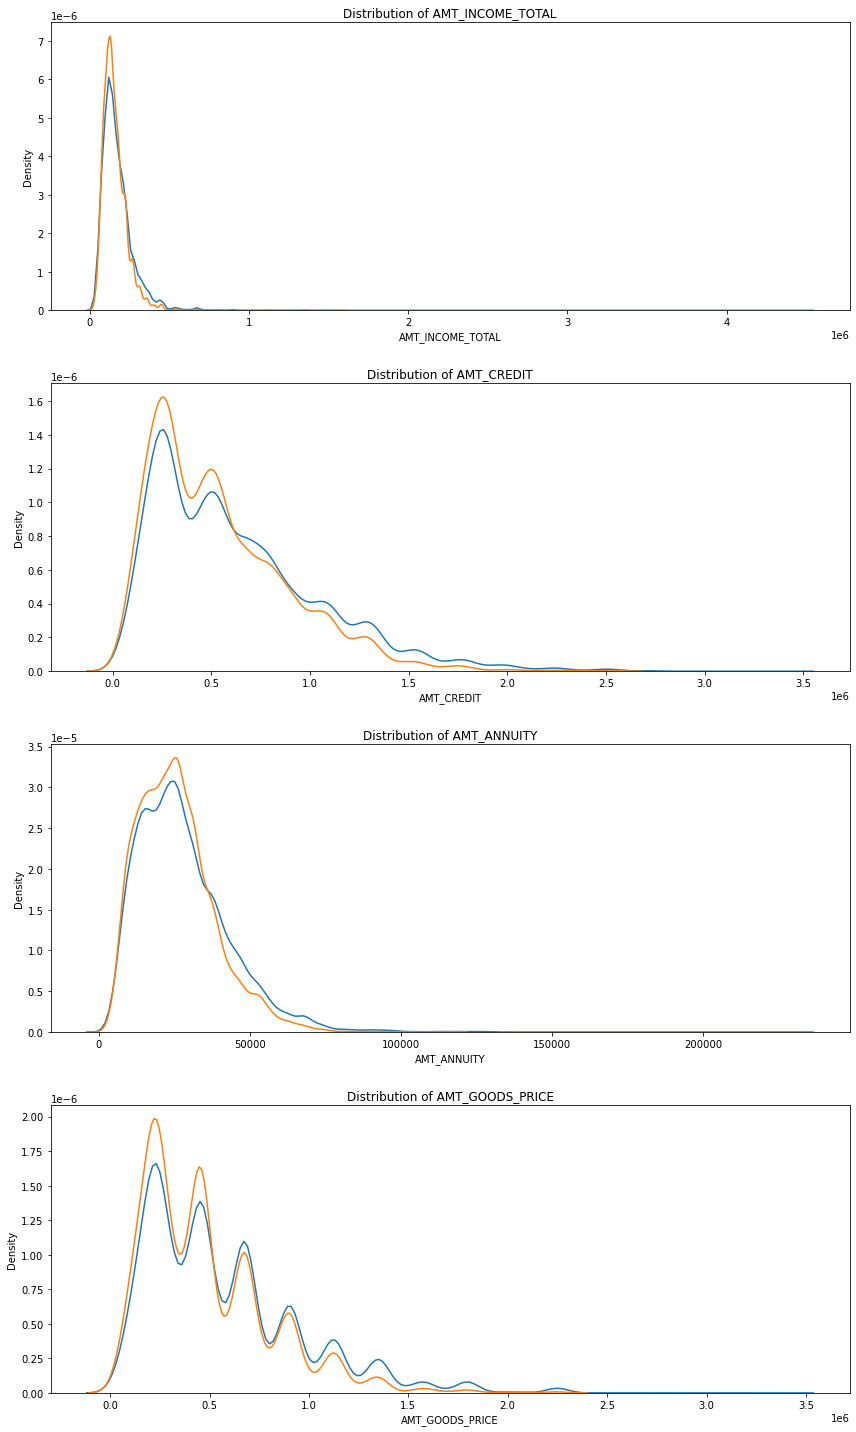

In [80]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(good[feature])
    # plot loans that were not repaid
    sns.kdeplot(bad[feature])
    
    # Label the plots
    plt.title('Distribution of %s' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)